# **TOPIC MODELING**

***IMPORTING LIBRARIES***


In [7]:
!pip install bertopic
!pip install openai
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [8]:
# Data processing
import pandas as pd
import numpy as np
# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
from bertopic import BERTopic  # rerun the cell if the import fails

In [6]:
!pip install umap
from umap import UMAP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=61aae3f114eef82a015f348b4df3e060b099052355fd82fbf68d6958fb1680b6
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [10]:
data = pd.read_csv("/content/Petsmart_twitter_data (6).csv")  # Load ther required csv file


***DATA PREPROCESSING***

In [13]:
stopwords = nltk.corpus.stopwords.words('english')
print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

# Remove stopwords
data['review_without_stopwords'] = data['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))
# Lemmatization
data['review_lemmatized'] = data['review_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))
# Take a look at the data
data['review_lemmatized']=data['review_lemmatized'].str.lower()

# define the regular expression pattern to match punctuation
punct_pattern = re.compile(r'[.,?;]')

# remove punctuation from each row in the 'text' column
data['review_lemmatized'] = data['review_lemmatized'].str.replace(punct_pattern, '')

# remove unnecessary words for topic modeling
words_to_remove = ['petsmart','chewy','petco','de','en','la', 'que', 'el','#petsmart','#petco','get','got','amp','eso', 'los', 'consentido','amp']
data['final_tweets'] = data['review_lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word not in words_to_remove]))
data['final_tweets_2'] = data['final_tweets'].apply(lambda x: ' '.join([word for word in x.split() if len(word) >= 3]))
data['final_tweets_3'] = data['final_tweets_2'].apply(lambda x: ' '.join([word for word in x.split() if word not in words_to_remove]))

There are 179 default stopwords. They are ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

In [14]:
data

,Id,Date,Tweet,Location,Retweet Count,Favorite Count,Total Tweets Count,Sentiment Score,Sentiment,Positive Sentiment Score,Neutral Sentiment Score,Negative Sentiment Score,review_without_stopwords,review_lemmatized,final_tweets,final_tweets_2,final_tweets_3
0,1646622322739015692,2023-04-13,"Quick, hide it before it becomes the next rage...",Connecticut,0,0,1,[ 0.17140907 0.7923502 -0.8316461 ],Neutral,-0.831646,0.792350,0.171409,"Quick, hide becomes next rage Petsmart!",quick hide becomes next rage petsmart!,quick hide becomes next rage petsmart!,quick hide becomes next rage petsmart!,quick hide becomes next rage petsmart!
1,1646618278700171264,2023-04-13,"I'm at in Pittsburgh, PA",NaN,0,0,1,[-1.7575119 2.3573275 -0.5046378],Neutral,-0.504638,2.357327,-1.757512,"I'm Pittsburgh, PA",i'm pittsburgh pa,i'm pittsburgh pa,i'm pittsburgh,i'm pittsburgh
2,1646614603466702863,2023-04-13,harry’s house shirt sighting in petsmart hello,NaN,0,0,1,[-2.114253 1.7834618 0.2936031],Neutral,0.293603,1.783462,-2.114253,harry’s house shirt sighting petsmart hello,harry’s house shirt sighting petsmart hello,harry’s house shirt sighting hello,harry’s house shirt sighting hello,harry’s house shirt sighting hello
3,1646613693956857856,2023-04-13,look at this birb i saw yesterday at petsmart....,NaN,0,0,1,[ 2.0628967 -0.26852918 -1.7350017 ],Negative,-1.735002,-0.268529,2.062897,look birb saw yesterday petsmart. he’s silly,look birb saw yesterday petsmart he’s silly,look birb saw yesterday he’s silly,look birb saw yesterday he’s silly,look birb saw yesterday he’s silly
4,1646613038139682817,2023-04-13,📚🐾 #Mixbook &amp; #PetSmart partner to create ...,California,0,0,1,[-3.38604 0.24371769 3.6288638 ],Positive,3.628864,0.243718,-3.386040,📚🐾 #Mixbook &amp; #PetSmart partner create exc...,📚🐾 #mixbook &amp #petsmart partner create excl...,📚🐾 #mixbook &amp partner create exclusive pet ...,#mixbook &amp partner create exclusive pet col...,#mixbook &amp partner create exclusive pet col...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,1644477460241604609,2023-04-07,You know whats crazy but not illegal? You can ...,NaN,2,59,3,[-0.38125598 0.5044388 0.00358663],Neutral,0.003587,0.504439,-0.381256,know whats crazy illegal? buy 5 gerbils PetSma...,know whats crazy illegal buy 5 gerbil petsmart...,know whats crazy illegal buy 5 gerbil start gr...,know whats crazy illegal buy gerbil start gril...,know whats crazy illegal buy gerbil start gril...
818,1644473796760403968,2023-04-07,Titan gets new toys almost every time I go to ...,NaN,0,4,1,[-1.2497585 0.4179206 1.1741511],Positive,1.174151,0.417921,-1.249758,Titan gets new toys almost every time go TJ Ma...,titan get new toy almost every time go tj maxx...,titan new toy almost every time go tj maxx (wh...,titan new toy almost every time maxx (which of...,titan new toy almost every time maxx (which of...
819,1644470270940381185,2023-04-07,You look soooo fabulous.!!😍😍😍,Florida,0,0,1,[-2.2147334 -0.86070156 4.0055 ],Positive,4.005500,-0.860702,-2.214733,look soooo fabulous.!!😍😍😍,look soooo fabulous!!😍😍😍,look soooo fabulous!!😍😍😍,look soooo fabulous!!😍😍😍,look soooo fabulous!!😍😍😍
820,1644469002838614016,2023-04-07,PetSmart has a good training class but do some...,Maryland,0,0,1,[-1.9212651 0.67466474 1.2605772 ],Positive,1.260577,0.674665,-1.921265,PetSmart good training class searching make fi...,petsmart good training class searching make fi...,good training class searching make final decision,good training class searching make final decision,good training class searching make final decision


***MODEL BUILDING***

In [15]:
# Import the KeyBERTInspired class from the bertopic.representation module
from bertopic.representation import KeyBERTInspired

# Create a new instance of the KeyBERTInspired class
# This will be used to create a representation model for keyphrase extraction or summarization tasks
representation_model = KeyBERTInspired()


In [16]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,                                                            
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)


In [17]:
import time
start_time = time.time()
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,nr_topics=11, representation_model=representation_model)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(data['final_tweets_3'])
end_time = time.time()
total_time=end_time-start_time
print(f"Total time elapsed: {total_time:.2f} seconds")

Total time elapsed: 42.90 seconds


In [18]:
# Get the list of topics
freq= topic_model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 11


,Topic,Count,Name
0,-1,237,-1_vet_pet_dog_puppy
1,0,128,0_petsmart_pets_gift_pet
2,1,93,1_adoptdontshop_puppies_adopt_adoption
3,2,90,2_sct_actnearn_spurs_team
4,3,79,3_customer_email_send_need


In [19]:
freq 

,Topic,Count,Name
0,-1,237,-1_vet_pet_dog_puppy
1,0,128,0_petsmart_pets_gift_pet
2,1,93,1_adoptdontshop_puppies_adopt_adoption
3,2,90,2_sct_actnearn_spurs_team
4,3,79,3_customer_email_send_need
5,4,53,4_happy_hugs_thankies_treats
6,5,52,5_easter_holiday_employee_sunday
7,6,30,6_parking_gerbil_grill_grilling
8,7,22,7_business_companies_industry_marketplace
9,8,21,8_fish_aquarium_aquariums_tank


In [20]:
df = pd.DataFrame(columns=['Topic','Word','Freq'])
for topic in range(117):
  if topic < len(freq.index):
    a_topic = freq.iloc[topic]["Topic"] # Select the 1st topic
    words_list = topic_model.get_topic(a_topic)

    for word_tuple in words_list:
      new_row = {'Topic':a_topic,'Word':word_tuple[0],'Freq':word_tuple[1]}
      df = df.append(new_row, ignore_index=True)

In [21]:
# Merge the dataframes based on the 'Topic' column
merged_df = pd.merge(freq, df, on='Topic')

# Print the resulting merged dataframe
print(merged_df)

    Topic  Count                         Name        Word      Freq
0      -1    237         -1_vet_pet_dog_puppy         vet  0.484898
1      -1    237         -1_vet_pet_dog_puppy         pet  0.446522
2      -1    237         -1_vet_pet_dog_puppy         dog  0.429327
3      -1    237         -1_vet_pet_dog_puppy       puppy  0.417886
4      -1    237         -1_vet_pet_dog_puppy      animal  0.396534
..    ...    ...                          ...         ...       ...
105     9     17  9_ban_banned_banning_lgbtqi  harassment  0.415435
106     9     17  9_ban_banned_banning_lgbtqi      harass  0.407696
107     9     17  9_ban_banned_banning_lgbtqi  homophobic  0.400549
108     9     17  9_ban_banned_banning_lgbtqi         wtf  0.392758
109     9     17  9_ban_banned_banning_lgbtqi         guy  0.378787

[110 rows x 5 columns]


In [22]:
merged_df.to_csv("Topic_Data_2.csv")  # Each topic with list of top 10 words 

In [24]:
r = []
for i in range(10):
    topic_words = [word[0] for word in topic_model.get_topic(i)]
    r.append((i, topic_words))
  
print(r)

df3 = pd.DataFrame(r, columns=['topic', 'topic_words'])
df3.to_csv('topics.csv', index=False)  #List of topics 

[(0, ['petsmart', 'pets', 'gift', 'pet', 'prize', 'dog', 'card', 'puppy', 'giveaway', 'animal']), (1, ['adoptdontshop', 'puppies', 'adopt', 'adoption', 'puppy', 'roseville', 'rosevilleca', 'adopted', 'location', 'dogs']), (2, ['sct', 'actnearn', 'spurs', 'team', 'duncan', 'rocking', 'put', 'spur', 'elliot', 'jersey']), (3, ['customer', 'email', 'send', 'need', 'issue', 'order', 'help', 'care', 'name', 'error']), (4, ['happy', 'hugs', 'thankies', 'treats', 'thanks', 'cute', 'tease', 'thank', 'pup', 'excited']), (5, ['easter', 'holiday', 'employee', 'sunday', 'day', 'closing', 'retailer', 'walmart', 'delivery', 'shopper']), (6, ['parking', 'gerbil', 'grill', 'grilling', 'illegal', 'car', 'robbing', 'legal', 'truck', 'driving']), (7, ['business', 'companies', 'industry', 'marketplace', 'company', 'invested', 'investment', 'dotcom', 'investments', 'bitcoin']), (8, ['fish', 'aquarium', 'aquariums', 'tank', 'goldfish', 'pool', 'gallon', 'jellyfish', 'water', 'filtered']), (9, ['ban', 'banned

In [25]:
topic_words

['ban',
 'banned',
 'banning',
 'lgbtqi',
 'harassing',
 'harassment',
 'harass',
 'homophobic',
 'wtf',
 'guy']

***DATA VISUALIZATION***

In [26]:
# Visualize top topic keywords
topic_model.visualize_barchart()

In [27]:
# Create a new DataFrame with the topics and tweets
topic_df = pd.DataFrame({'topic': topics, 'tweet': data['final_tweets_3']})

# Group the DataFrame by topic and aggregate the tweets
topic_groups = topic_df.groupby('topic')['tweet'].apply(list)

# Print the topics and associated tweets
Data_Topic=[]
for topic, tweets in topic_groups.items():
    print(f"Topic {topic}:")
    print('\n'.join(tweets))
    print()

Topic -1:
i'm pittsburgh
harry’s house shirt sighting hello
hey make sure beta aren’t getting ammonia burn organ shutdown little cups
cry middle cause i’m listening hastune miku
director resigned started killing animal grandfathered microchipped agent killing snake 4ft regardless type boa (which pregnant) owned decade still buy boa state
#wtf i'm pissed write hand shaking i've client boca store since opened believe 1988 shop time use coupons i'm probably every 3-4 week i've large dogs
lemme talk someone ever there…
blue budging lmaoo know they're shit😭
gotta buy bad knight food…i need sale…
yes! steroid immediate relief switch dog food leading allergy find non allergy brand &amp vet put hills prescription royal canin meantime steam cook plain ground chicken &amp take current food away
dog pound jim brown stadium
jus left lowe’s🏠 omw mofo lowe’s staff talmbout ohh snoop dogg lmaooooo 🗣️🗣️🗣️
worked pet hotel!! loved honestly hope
register upcoming webinar laying foundation omnichannel re

In [28]:
data['Topic']=topic_df['topic']

In [29]:
data.to_csv("Topic_Data.csv") # All attributes with topic column

In [30]:
topic_df.to_csv("Topic_2.csv")  #Topics with tweet column

In [31]:
topic_groups = topic_df.groupby('topic')['tweet'].apply(len)

In [32]:
print(topic_groups)

topic
-1    237
 0    128
 1     93
 2     90
 3     79
 4     53
 5     52
 6     30
 7     22
 8     21
 9     17
Name: tweet, dtype: int64


In [33]:
# Visualize intertopic distance
topic_model.visualize_topics()

In [34]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

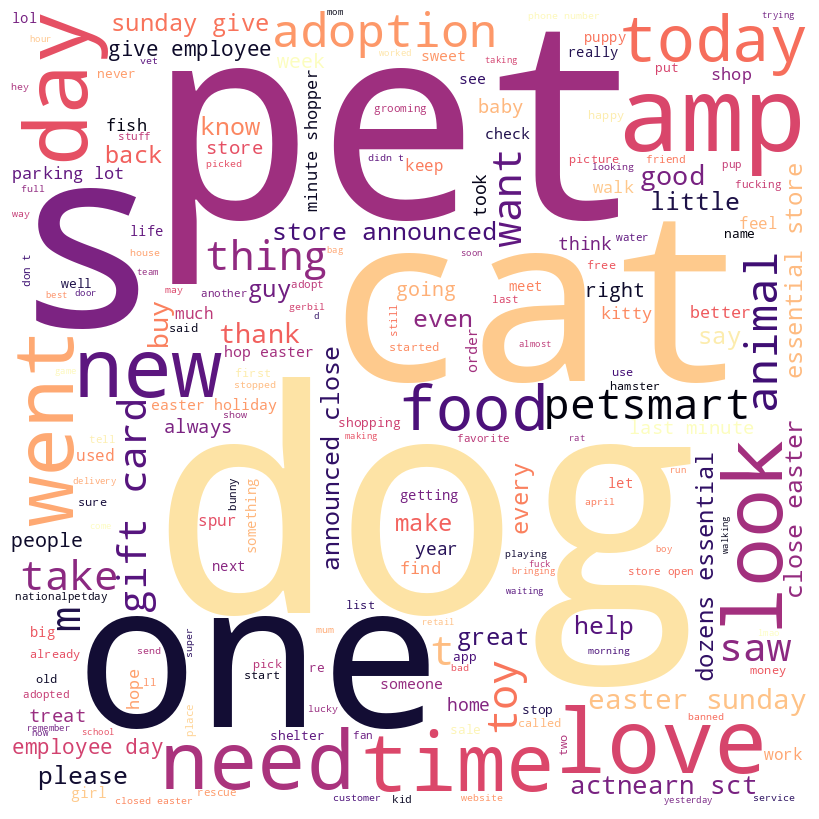

In [36]:
# load the data
#data = pd.read_csv('data.csv')

# create a word cloud from the 'text' column
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200, colormap='magma').generate(' '.join(data['final_tweets_3'].astype(str)))

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()